In [20]:
import os
import gzip
import csv
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data_path = "../data/"
train_f = "sales_train.csv.gz"
test_f = "test.csv.gz"

### Read training data and testing list

In [10]:
df = pd.read_csv(os.path.join(data_path, train_f))
test_df = pd.read_csv(os.path.join(data_path, test_f))
print(df.shape)
print(test_df.shape)

(2935849, 6)
(214200, 3)


In [5]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [12]:
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


### Training set items

In [6]:
item_ids = df.item_id.unique()
item_ids.sort()
print(item_ids)
print(len(item_ids))

[    0     1     2 ... 22167 22168 22169]
21807


### Testing set items

In [13]:
test_item_ids = test_df.item_id.unique()
test_item_ids.sort()
print(test_item_ids)
print(len(test_item_ids))

[   30    31    32 ... 22164 22166 22167]
5100


### Training set shops

In [14]:
train_shop_ids = df.shop_id.unique()
train_shop_ids.sort()
print(train_shop_ids)
print(len(train_shop_ids))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
60


### Testing shops 

In [15]:
test_shop_ids = test_df.shop_id.unique()
test_shop_ids.sort()
print(test_shop_ids)
print(len(test_shop_ids))

[ 2  3  4  5  6  7 10 12 14 15 16 18 19 21 22 24 25 26 28 31 34 35 36 37
 38 39 41 42 44 45 46 47 48 49 50 52 53 55 56 57 58 59]
42


### Find the cheap items and expensive items 

#### Find the price range

In [21]:
prices = df.item_price.unique()
print(len(prices))
print(max(prices))
print(min(prices))
print(np.mean(prices))

19993
307980.0
-1.0
2147.9086968207744


[11036.  2678.  1224.   716.   442.   357.   274.   203.   158.   163.
   132.   109.   104.    89.    88.   100.    58.    72.    71.    62.]


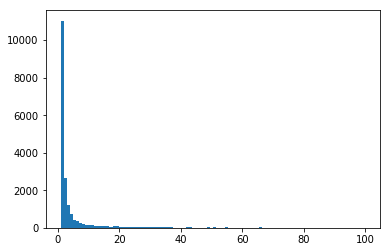

In [55]:
price_counts = df.item_price.value_counts()
fig, ax = plt.subplots()
bin_counts, *_ = ax.hist(price_counts, range=[1, 100], bins = 100)
print(bin_counts[:20])

#### Find the price range in test target items

In [69]:
test_prices = set()
for item in test_item_ids:
    row = df.loc[lambda df: df["item_id"] == item]
    prices = row.item_price.unique()
    for p in prices:
        test_prices.add(p)
print(len(test_prices))

14594


In [72]:
print(max(test_prices))
print(min(test_prices))
print(np.mean(list(test_prices)))

59200.0
0.5
1909.110494006007


### Plot the sale curve of an item (which is available for more than 30 day blocks in a shop)

In [90]:
vc = list()
for item_id in item_ids:
    shop = df.loc[(df["shop_id"]==2) & (df["item_id"]==item_id)]
    date_blocks = shop["date_block_num"].unique()
    if len(date_blocks) >= 30:
        for i, d in enumerate(date_blocks):
            vc.append((d, shop.loc[shop["date_block_num"] == d]["item_cnt_day"].sum()))
        print(vc)
        vc.sort()
        print(item_id)
        break

[(0, 17.0), (1, 4.0), (2, 9.0), (3, 4.0), (4, 4.0), (5, 12.0), (6, 3.0), (7, 4.0), (8, 9.0), (10, 3.0), (11, 5.0), (12, 6.0), (13, 2.0), (14, 3.0), (15, 2.0), (16, 7.0), (17, 10.0), (18, 2.0), (19, 5.0), (20, 6.0), (21, 1.0), (22, 1.0), (23, 10.0), (24, 3.0), (25, 1.0), (27, 1.0), (28, 1.0), (29, 2.0), (30, 1.0), (31, 4.0), (32, 1.0), (33, 1.0)]
2808


In [91]:
print(vc)
print(len(vc))

[(0, 17.0), (1, 4.0), (2, 9.0), (3, 4.0), (4, 4.0), (5, 12.0), (6, 3.0), (7, 4.0), (8, 9.0), (10, 3.0), (11, 5.0), (12, 6.0), (13, 2.0), (14, 3.0), (15, 2.0), (16, 7.0), (17, 10.0), (18, 2.0), (19, 5.0), (20, 6.0), (21, 1.0), (22, 1.0), (23, 10.0), (24, 3.0), (25, 1.0), (27, 1.0), (28, 1.0), (29, 2.0), (30, 1.0), (31, 4.0), (32, 1.0), (33, 1.0)]
32


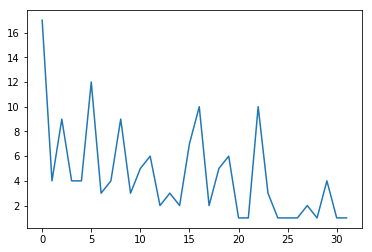

In [92]:
plt.plot(range(len(vc)), [value[1] for value in vc])

### Convert "date" to pandas datetime and sort the dataset by date

In [93]:
df["date"] = pd.to_datetime(df.date, dayfirst=True)

In [94]:
df = df.sort_values(by="date")

In [95]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
49800,2013-01-01,0,18,5823,2500.0,1.0
75872,2013-01-01,0,54,17111,149.0,1.0
48044,2013-01-01,0,15,12168,189.0,2.0
51977,2013-01-01,0,18,3686,899.0,1.0
59414,2013-01-01,0,13,13598,9.0,3.0


### Save date sorted dataset

In [96]:
df.to_csv("../data/sorted_training.csv.gz")